In [ ]:
!pip install spicy
!pip install matplotlib
!pip install numpy

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline

In [4]:
'''Calculates the total probability of the ball
landing to the right or left of the original
in a general case'''
def total_b(pmf: list, b_right: bool):
    # If to the right
    if b_right:
        total_prob = []
        for i, prob in enumerate(pmf):
            total_prob.append(prob * (len(pmf) - i - 1) / (len(pmf) - 1))
        return sum(total_prob)
    # Otherwise
    total_prob = []
    for i, prob in enumerate(pmf):
        total_prob.append(prob * i / (len(pmf) - 1))
    return sum(total_prob)

In [5]:
'''Calculates the total probability of the ball
landing to the right or left of the original
when original's position is given'''
def b_given_a(a: int, num: int, b_right: bool):
    return (num - a - 1) / (num - 1) if b_right else a / (num - 1)

In [6]:
'''A single simulation of the problem 
given the PMF and where the colored ball landed'''
def update(pmf: list, b_right: bool):
    tb = total_b(pmf, b_right)
    for i in range(len(pmf)):
        pmf[i] = b_given_a(i, len(pmf), b_right) * pmf[i] / tb

### The next cell contains parameters for the problem simulation
You can set the parameters and run the two cells below the next to simulate and plot the graph of the PMF

In [44]:
n = 100 # number of possible ball positions
pos = 29 # position of the white ball
num_throws = 100 # number of colored ball throws

In [45]:
pmf = [1/n for _ in range(n)]
import random
for i in range(num_throws):
    update(pmf, random.randint(0, n - 1) > pos)

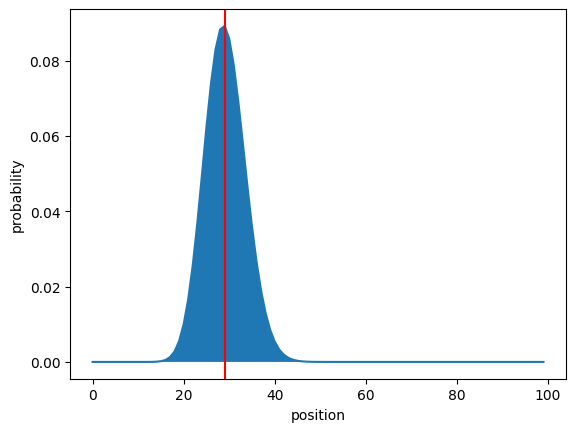

In [46]:
x = [i for i in range(len(pmf))]
 
# Plotting the Graph
plt.plot(x, pmf)
plt.fill_between(x, pmf)
plt.axvline(pos, color=(1.0, 0, 0))
plt.xlabel("position")
plt.ylabel("probability")
plt.show()

### The next part is intended to run many such simulations and find the distribution of the points with the maximum probability

In [47]:
def simulate(n, pos, pmf, num_throws):
    for i in range(num_throws):
        update(pmf, random.randint(0, n - 1) > pos)

In [48]:
maxs = []
for i in range(10000):
    n = 100
    pos = 50
    pmf = [1/n for _ in range(n)]
    simulate(n, pos, pmf, 6)
    maxs.append(pmf.index(max(pmf)))

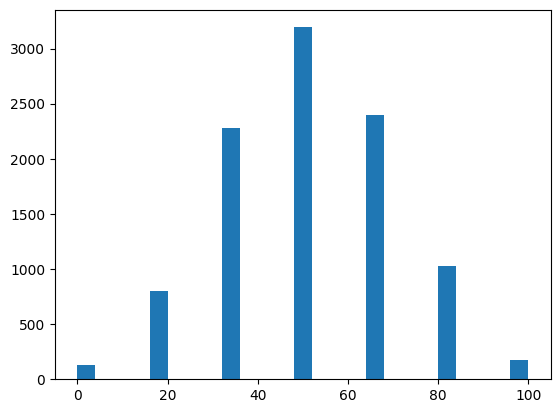

In [49]:
plt.hist(maxs, bins=25, range=(0, 100))
plt.show()